In [1]:
from collections import deque
import random

class ReplayBuffer(object):

    def __init__(self, capacity):
        self.buffer_size = capacity #maximum size of replaybuffer
        self.num_experiences = 0 #experiences
        self.buffer = deque() #deque

    def getBatch(self, batch_size):
        # Randomly sample batch_size and returns, 
        #if replay buffer doesnt have as many experiences as needed a random sample of num.experinece is returned
        if self.num_experiences < batch_size:
            return random.sample(self.buffer, self.num_experiences)
        else:
            return random.sample(self.buffer, batch_size)

    def size(self): #function that returns maximum size of 
        return self.buffer_size
    
    #function to add experiences
    def add(self, state, action, reward, new_state, done, adjacency):
        experience = (state, action, reward, new_state, done, adjacency)
        if self.num_experiences < self.buffer_size:
            self.buffer.append(experience)
            self.num_experiences += 1
        else:
            self.buffer.popleft()
            self.buffer.append(experience)

    #returns no of experience currently the buffer has saved
    def count(self):
        return self.num_experiences
    
    #erases the buffer completely
    def erase(self):
        self.buffer = deque()
        self.num_experiences = 0

In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import math

np.random.seed(476)
np.__version__

import sys
print(sys.version)

Using TensorFlow backend.


3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]


In [3]:
class Router(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.neighbor = []
        self.edge = []

class Edge(object):
    def __init__(self,x,y,l):
        self.start = x
        self.end = y
        self.len = int(int(l*10)/2+1)
        self.load = 0

class Data(object):
    def __init__(self,x,y,size,priority):
        self.now = x
        self.target = y
        self.size = size
        self.priority = priority
        self.time = 0
        self.edge = -1
        self.neigh = [priority,-1,-1,-1]

router = []
edges = []
t_edge = 0 ##keeps tracks of the number of edges in the graph
n_router = 25

0 0
0.25 0
0.5 0
0.75 0
1.0 0
0 0.25
0.25 0.25
0.5 0.25
0.75 0.25
1.0 0.25
0 0.5
0.25 0.5
0.5 0.5
0.75 0.5
1.0 0.5
0 0.75
0.25 0.75
0.5 0.75
0.75 0.75
1.0 0.75
0 1.0
0.25 1.0
0.5 1.0
0.75 1.0
1.0 1.0


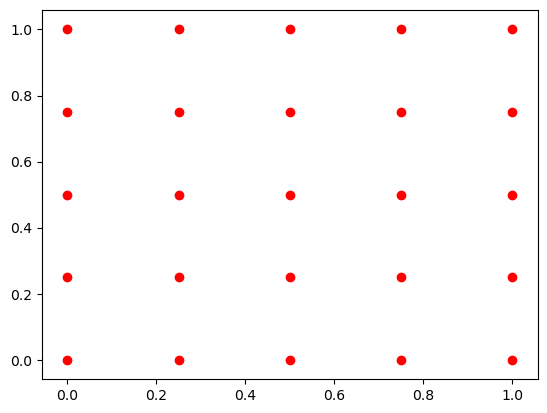

In [4]:
#Router Topology (Router Positions)
#Router Topology (Router Positions)
y_coordinate = 0
x_coordinate = 0
x_increment = 0.25
y_increment = 0.25
x_max = 1
y_max = float('inf')  # Assuming there's no maximum y-coordinate

for i in range(n_router):
    router.append(Router(x_coordinate, y_coordinate))
    x_coordinate += x_increment
    if x_coordinate > x_max:
        x_coordinate = 0
        y_coordinate += y_increment

for i in range(n_router):
	print(router[i].x,router[i].y)
	plt.scatter(router[i].x, router[i].y, color = 'red')
plt.show() 

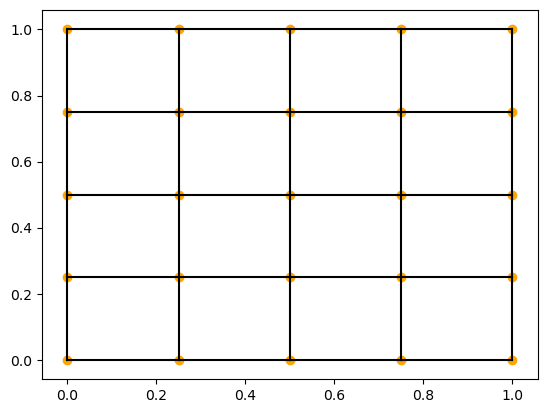

In [5]:
for i in range(n_router):
  dis = []
  for j in range(n_router):
    dis.append([(router[j].x - router[i].x)**2 + (router[j].y - router[i].y)**2, j])
  dis.sort(key = lambda x: x[0],reverse = False)

  for j in range(n_router):
    if(j==i):
      continue
    else:
      if(dis[j][0] == 0.0625):
        if dis[j][1] not in router[i].neighbor:
          router[i].neighbor.append(dis[j][1])
          router[dis[j][1]].neighbor.append(i)
          if i<dis[j][1]:
            edges.append(Edge(i,dis[j][1],np.sqrt(dis[j][0])))
            router[i].edge.append(t_edge)
            router[dis[j][1]].edge.append(t_edge)
            t_edge += 1
          else:
            edges.append(Edge(dis[j][1],i,np.sqrt(dis[j][0])))
            router[dis[j][1]].edge.append(t_edge)
            router[i].edge.append(t_edge)
            t_edge += 1

      

for i in range(n_router):
    plt.scatter(router[i].x, router[i].y, color = 'orange')
for e in edges:
    plt.plot([router[e.start].x,router[e.end].x],[router[e.start].y,router[e.end].y],color='black')

In [6]:
print("total no of edges: ",t_edge)
for i in range(n_router):
  print("Router {}: x = {} y = {} neighbor = {} edges = {}".format(i,router[i].x,router[i].y,router[i].neighbor,router[i].edge))
for i in range(t_edge):
  print("Edge {}: start_point = {} end_point = {} length = {}".format(i,edges[i].start,edges[i].end,edges[i].len))

total no of edges:  40
Router 0: x = 0 y = 0 neighbor = [1, 5] edges = [0, 1]
Router 1: x = 0.25 y = 0 neighbor = [0, 2, 6] edges = [0, 2, 3]
Router 2: x = 0.5 y = 0 neighbor = [1, 7, 3] edges = [2, 4, 5]
Router 3: x = 0.75 y = 0 neighbor = [2, 4, 8] edges = [5, 6, 14]
Router 4: x = 1.0 y = 0 neighbor = [3, 9] edges = [6, 7]
Router 5: x = 0 y = 0.25 neighbor = [0, 6, 10] edges = [1, 8, 9]
Router 6: x = 0.25 y = 0.25 neighbor = [1, 5, 7, 11] edges = [3, 8, 10, 11]
Router 7: x = 0.5 y = 0.25 neighbor = [2, 6, 8, 12] edges = [4, 10, 12, 13]
Router 8: x = 0.75 y = 0.25 neighbor = [7, 3, 9, 13] edges = [12, 14, 15, 16]
Router 9: x = 1.0 y = 0.25 neighbor = [4, 8, 14] edges = [7, 15, 17]
Router 10: x = 0 y = 0.5 neighbor = [5, 11, 15] edges = [9, 18, 19]
Router 11: x = 0.25 y = 0.5 neighbor = [6, 10, 12, 16] edges = [11, 18, 20, 21]
Router 12: x = 0.5 y = 0.5 neighbor = [7, 11, 13, 17] edges = [13, 20, 22, 23]
Router 13: x = 0.75 y = 0.5 neighbor = [8, 12, 14, 18] edges = [16, 22, 24, 25]
Ro

In [7]:
data = []
n_data = 20
for i in range(n_data):
    data.append(Data(np.random.randint(n_router),np.random.randint(n_router),np.random.random(),i))
#Priority has been passed according to order of creation

for i in range(n_data):
    print("Data Packet {}: start_point = {}, target  ={}, size = {}, priority = {}".format(i,data[i].now,data[i].target,data[i].size,data[i].priority))
    

Data Packet 0: start_point = 23, target  =22, size = 0.346225131531554, priority = 0
Data Packet 1: start_point = 20, target  =20, size = 0.003956348007303712, priority = 1
Data Packet 2: start_point = 13, target  =11, size = 0.814600768961296, priority = 2
Data Packet 3: start_point = 15, target  =1, size = 0.19120860415911356, priority = 3
Data Packet 4: start_point = 24, target  =18, size = 0.712725239895066, priority = 4
Data Packet 5: start_point = 17, target  =14, size = 0.6423568433363959, priority = 5
Data Packet 6: start_point = 24, target  =21, size = 0.24940574738844146, priority = 6
Data Packet 7: start_point = 12, target  =17, size = 0.44820512956768666, priority = 7
Data Packet 8: start_point = 14, target  =20, size = 0.9590897908468766, priority = 8
Data Packet 9: start_point = 20, target  =24, size = 0.7206297904058143, priority = 9
Data Packet 10: start_point = 1, target  =16, size = 0.9978962527412192, priority = 10
Data Packet 11: start_point = 1, target  =22, size =

In [8]:
path = [[] for _ in range(n_data)]
print(path)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [9]:
for i in range(n_data):
    path[i].append("Start:"+str(data[i].now))
print(path)

[['Start:23'], ['Start:20'], ['Start:13'], ['Start:15'], ['Start:24'], ['Start:17'], ['Start:24'], ['Start:12'], ['Start:14'], ['Start:20'], ['Start:1'], ['Start:1'], ['Start:0'], ['Start:6'], ['Start:20'], ['Start:4'], ['Start:17'], ['Start:19'], ['Start:16'], ['Start:16']]


In [10]:
def observation(router, edges, data, n_router, n_data, t_edge):
	obs = []
	for i in range(n_data):
		ob=[]

		####meta information####
		ob.append(data[i].now)
		ob.append(data[i].target)
		ob.append(data[i].edge)
		ob.append(data[i].size)
		ob.append(data[i].priority)

		####edge information####
		edge_count=0
		for j in router[data[i].now].edge:
			edge_count+=1
			ob.append(j)
			ob.append(edges[j].start)
			ob.append(edges[j].end)
			ob.append(edges[j].len)
			ob.append(edges[j].load)
		for j in range(4-edge_count): ####
			for k in range(5): ####
				ob.append(-1) #invalid placeholder  ####      
        
		####other datas####
		count =0;
		data[i].neigh = []
		data[i].neigh.append(i)

		for j in range(n_data):
			if j==i:
				continue
			if (data[j].now in router[data[i].now].neighbor)|(data[j].now == data[i].now):
				count+=1
				ob.append(data[j].now)
				ob.append(data[j].target)
				ob.append(data[j].edge)
				ob.append(data[j].size)
				ob.append(data[i].priority)
				data[i].neigh.append(j)

			if count==3:
				break
		for j in range(3-count):
			data[i].neigh.append(-1)
			for k in range(5):
				ob.append(-1) #invalid placeholder

		obs.append(np.array(ob))
	return obs



In [11]:
def set_action(act, q_values, edges, data, n_data, t_edge, faulty_edges):
    reward = [0] * n_data
    done = [False] * n_data
                            
    for i in range(n_data):
        # Handling data packets on edges
#         print("action taken initially ", act[i])
        if data[i].edge != -1:
            data[i].time -= 1
            if data[i].time == 0:
#                 edges[data[i].edge].load -= data[i].size
                data[i].edge = -1
                print("Reached first condition")
        
        elif 0 <= act[i] < len(router[data[i].now].edge):
            t = router[data[i].now].edge[act[i]]
#             if edges[t].load + data[i].size > 1:
#                 reward[i] = -0.1  # Penalty for overload
            print("overload conditon")
            data[i].edge = t
            data[i].time = edges[t].len
            edges[t].load += data[i].size
            if edges[t].start == data[i].now:
                data[i].now = edges[t].end
            else:
                data[i].now = edges[t].start
            reward[i] = 0.8  # Reward for successful step
            if t in faulty_edges:
                reward[i] -= 5  # Penalty for landing on a faulty edge

        # Handling invalid actions
        else:
            print("It was an invalid action")
            reward[i] = -3  # Penalty for invalid action
            valid_actions = [idx for idx in range(len(router[data[i].now].edge))]
            next_best_action = random.choice(valid_actions)
            act[i] = next_best_action
            t = router[data[i].now].edge[act[i]]
            data[i].edge = t
            data[i].time = edges[t].len
            edges[t].load += data[i].size
            if edges[t].start == data[i].now:
                data[i].now = edges[t].end
            else:
                data[i].now = edges[t].start    
            if t in faulty_edges:
                reward[i] -= 5 
            
        # Reward for reaching the target
        if data[i].now == data[i].target:
            reward[i] = 15
            path[i].append("target:" + str(data[i].now))
            done[i] = True

    return data, edges, reward, done

In [12]:
import os, sys, time
from keras import backend as K
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import random
# from ReplayBuffer_v2 import ReplayBuffer
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Input, Lambda, Flatten, TimeDistributed, Concatenate
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector
from tensorflow.keras.models import Model
from keras.layers.core import Activation
from keras.utils import np_utils,to_categorical
from keras.engine.topology import Layer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2

neighbors = 4
len_feature = 40 #length of observation array
action_space = 4 #maximum possible actions, 5 for 4 edges+1 no action

#Does a one hot encoding of all the neighbouring data
def Adjacency(data,n_data):
	adj = []
	for j in range(n_data):
		l = to_categorical(data[j].neigh,num_classes=n_data)
		for i in range(4):
			if data[j].neigh[i] == -1:
				l[i]=np.zeros(n_data)
		adj.append(l)
	return adj

#multilayer perceptron that takes the input of shape [none,len_feature] and converts it into shape [none,1,128]
def MLP():
	In_0 = Input(shape=[len_feature])
	h = Dense(128, activation='relu',kernel_initializer='random_normal')(In_0)
# 	h = Dropout(0.1)(h)  # Dropout layer
	h = Dense(128, activation='relu',kernel_initializer='random_normal')(h)
# 	h = Dropout(0.1)(h)  # Another Dropout layer
	h = Reshape((1,128))(h)
	model = Model(In_0,h)
	return model


#function generates 2 multiheadattention model and returns then as model and model_
def MultiHeadsAttModel(l=2, d=128, dv=16, dout=128, nv=8):
    v1 = Input(shape=(l, d))
    q1 = Input(shape=(l, d))
    k1 = Input(shape=(l, d))
    ve = Input(shape=(1, l))

    # Adjust the dense layer dimension to match the input shape
    v2 = Dense(dv * nv, activation="relu", kernel_initializer='random_normal')(v1)
    q2 = Dense(dv * nv, activation="relu", kernel_initializer='random_normal')(q1)
    k2 = Dense(dv * nv, activation="relu", kernel_initializer='random_normal')(k1)

    v = Reshape((l, nv, dv))(v2)
    q = Reshape((l, nv, dv))(q2)
    k = Reshape((l, nv, dv))(k2)
    v = Lambda(lambda x: K.permute_dimensions(x, (0,2,1,3)))(v)
    k = Lambda(lambda x: K.permute_dimensions(x, (0,2,1,3)))(k)
    q = Lambda(lambda x: K.permute_dimensions(x, (0,2,1,3)))(q)

    att = Lambda(lambda x: K.batch_dot(x[0], x[1], axes=[3,3]) / np.sqrt(dv))([q, k])
    att_ = Lambda(lambda x: K.softmax(x))(att)
    out = Lambda(lambda x: K.batch_dot(x[0], x[1], axes=[3,2]))([att, v])
    out = Lambda(lambda x: K.permute_dimensions(x, (0,2,1,3)))(out)

    out = Reshape((l, dv * nv))(out)
    T = Lambda(lambda x: K.batch_dot(x[0], x[1]))([ve, out])

    out = Dense(dout, activation="relu", kernel_initializer='random_normal')(T)
    model = Model([q1, k1, v1, ve], out)
    model_ = Model([q1, k1, v1, ve], att_)

    return model, model_
#concatenates the input layers and passes it through a dense layer
def Q_Net(action_dim):

	I1 = Input(shape = (1, 128))
	I2 = Input(shape = (1, 128))
	I3 = Input(shape = (1, 128))

	h1 = Flatten()(I1)
	h2 = Flatten()(I2)
	h3 = Flatten()(I3)

	h = Concatenate()([h1,h2,h3])
	V = Dense(action_dim,kernel_initializer='random_normal')(h)

	model = Model([I1,I2,I3],V)
	return model



In [13]:
#faulty_router = []
#num = int(input("Enter the number of faulty routers: "))  # Convert input to integer
#for i in range(0, num):
#    faulty = int(input("Enter the faulty router number: "))
#    faulty_router.append(faulty)
#print("The faulty routers are: ", faulty_router)


faulty_edges = []
num = int(input("Enter the number of faulty edges: "))  # Convert input to integer
if num!=0:
    for i in range(0, num):
        faulty = int(input("Enter the faulty edge number: "))
        faulty_edges.append(faulty)
print("The faulty edges are: ", faulty_edges)


In [14]:
faulty_edges = []
num = int(input("Enter the number of faulty edges: "))  # Convert input to integer
if num!=0:
    for i in range(0, num):
        faulty = int(input("Enter the faulty edge number: "))
        faulty_edges.append(faulty)
print("The faulty edges are: ", faulty_edges)

Enter the number of faulty edges: 5
Enter the faulty edge number: 0
Enter the faulty edge number: 10
Enter the faulty edge number: 15
Enter the faulty edge number: 25
Enter the faulty edge number: 35
The faulty edges are:  [0, 10, 15, 25, 35]


In [15]:
def update_one_faulty_edge(current_faulty_edges, total_edges, current_index):
    # Generate a new edge that is not currently in the faulty edges list
    new_edge = random.choice([e for e in range(total_edges) if e not in current_faulty_edges])

    # Update the faulty edge at the current index
    current_faulty_edges[current_index] = new_edge
    return current_faulty_edges


In [16]:
def display_data_packet_info(data_packets):
    print("Episode Data Packet Info:")
    print("Packet ID | Current Position | Target Router")
    print("----------|------------------|--------------")
    for packet in data_packets:
        current = f"On Edge to {packet.target}" if packet.edge != -1 else f"Router {packet.now}"
        print(f"{packet.priority:9} | {current:17} | Router {packet.target}")


In [17]:
######build the model#########
encoder = MLP()
m1, m1_r = MultiHeadsAttModel(l=neighbors)  # neighbors for context analysis using a transformer
m2, m2_r = MultiHeadsAttModel(l=neighbors)
q_net = Q_Net(action_dim=action_space)  # maximum possible actions that can be taken
vec = np.zeros((1, neighbors))
vec[0][0] = 1
# array([[1., 0., 0., 0.]])

In = []
for j in range(n_data):
    In.append(Input(shape=[len_feature]))
    In.append(Input(shape=(neighbors, n_data)))  # 4,20
In.append(Input(shape=(1, neighbors)))
feature = []
for j in range(n_data):
    feature.append(encoder(In[j * 2]))  # observation vector is passed first through an encoder (MLP)

feature_ = Concatenate(axis=1)(feature)  # [none,1,128] output shape of encoder concatenated along the columns

relation1 = []
for j in range(n_data):
    T = Lambda(lambda x: K.batch_dot(x[0], x[1]))([In[j * 2 + 1], feature_])  # batch dot product
    relation1.append(m1([T, T, T, In[n_data * 2]]))  # passed to one of the attention models

relation1_ = Concatenate(axis=1)(relation1)

relation2 = []
for j in range(n_data):
    T = Lambda(lambda x: K.batch_dot(x[0], x[1]))([In[j * 2 + 1], relation1_])
    relation2.append(m2([T, T, T, In[n_data * 2]]))

V = []
for j in range(n_data):
    V.append(q_net([feature[j], relation1[j], relation2[j]]))

model = Model(In, V)
model.compile(optimizer=Adam(lr=0.001), loss='mse')
plot_model(model, to_file='model.png', show_shapes=True)

###### build the target model ######
encoder_t = MLP()
m1_t, _ = MultiHeadsAttModel(l=neighbors)
m2_t, _ = MultiHeadsAttModel(l=neighbors)
q_net_t = Q_Net(action_dim=action_space)
In_t = []
for j in range(n_data):
    In_t.append(Input(shape=[len_feature]))
    In_t.append(Input(shape=(neighbors, n_data)))
In_t.append(Input(shape=(1, neighbors)))

feature_t = []
for j in range(n_data):
    feature_t.append(encoder_t(In_t[j * 2]))

feature_t_ = Concatenate(axis=1)(feature_t)

relation1_t = []
for j in range(n_data):
    T = Lambda(lambda x: K.batch_dot(x[0], x[1]))([In_t[j * 2 + 1], feature_t_])
    relation1_t.append(m1_t([T, T, T, In_t[n_data * 2]]))

relation1_t_ = Concatenate(axis=1)(relation1_t)

relation2_t = []
for j in range(n_data):
    T = Lambda(lambda x: K.batch_dot(x[0], x[1]))([In_t[j * 2 + 1], relation1_t_])
    relation2_t.append(m2_t([T, T, T, In_t[n_data * 2]]))

V_t = []
for j in range(n_data):
    V_t.append(q_net_t([feature_t[j], relation1_t[j], relation2_t[j]]))

model_t = Model(In_t, V_t)

######### for regular ###############
Inr = []
for j in range(n_data):
    Inr.append(Input(shape=[len_feature]))
    Inr.append(Input(shape=(neighbors, n_data)))
Inr.append(Input(shape=(1, neighbors)))
featurer = []
for j in range(n_data):
    featurer.append(encoder(Inr[j * 2]))

featurer_ = Concatenate(axis=1)(featurer)

relationr1 = []
r2 = []
for j in range(n_data):
    T = Lambda(lambda x: K.batch_dot(x[0], x[1]))([Inr[j * 2 + 1], featurer_])
    relationr1.append(m1([T, T, T, Inr[n_data * 2]]))

relationr1_ = Concatenate(axis=1)(relationr1)

for j in range(n_data):
    T = Lambda(lambda x: K.batch_dot(x[0], x[1]))([Inr[j * 2 + 1], relationr1_])
    r2.append(m2_r([T, T, T, Inr[n_data * 2]]))

model_r = Model(Inr, r2)
model_r.compile(optimizer=Adam(lr=0.005), loss='mse')

# Parameters for training
total_episodes = 100  # Total number of episodes for training
alpha_start = 0.9  # Starting exploration rate
alpha_decay = 0.99995  # Decay rate of exploration
alpha_min = 0.05  # Minimum exploration rate
mini_batch = 32  # Size of the mini-batch for training
episode_before_train = 500  # Number of episodes before training starts
TAU=0.01
# Initialize the environment and the replay buffer
buff = ReplayBuffer(capacity=200000)
i_episode = 0
alpha = alpha_start
loss, score = 0, 0
num = 0
times = [0] * n_data
total_time = 0
# Logging and progress tracking
log_interval = 100  # Interval at which to log progress
GAMMA=0.98
# Initialize logging variables
cumulative_reward = 0
cumulative_loss = 0
episode_count = 0
successful_episodes = 0
num_faulty_edges = 5
current_index=0
# Training loop
while i_episode < total_episodes:
    i_episode += 1
    
    for i in range(n_data):
        times[i] = times[i] + 1
        if data[i].now == data[i].target:
            num+=1 #increments under successfull routing
            data[i].now = np.random.randint(n_router)
#             path[i].append("start :"+str(data[i].now)) 
            data[i].target = np.random.randint(n_router)
            data[i].time = 0
            if data[i].edge != -1:
                edges[data[i].edge].load -= data[i].size
            data[i].size = np.random.rand()
            data[i].edge = -1
            total_time+=times[i]
            times[i] = 0 
    alpha = max(alpha_min, alpha * alpha_decay)  # Decay the exploration rate

    # Apply actions and update states
    obs = observation(router, edges, data, n_router, n_data, t_edge)
    adj = Adjacency(data, n_data)
    ob = []
    for j in range(n_data):
        ob.append(np.asarray([obs[j]]))
        ob.append(np.asarray([adj[j]]))
    ob.append(np.asarray([vec]))
    q_values = model.predict(ob)
    act = np.zeros(n_data, dtype=np.int32)
    for j in range(n_data):
        act[j] = random.randrange(action_space) if np.random.rand() < alpha else np.argmax(q_values[j])
    
    data, edges, reward, done = set_action(act,q_values, edges, data, n_data, t_edge, faulty_edges)

    # Update next observation
    next_obs = observation(router, edges, data, n_router, n_data, t_edge)

    # Add experience to buffer
    buff.add(obs, act, next_obs, reward, done, adj)

    # Training
    if i_episode >= episode_before_train:
        batch = buff.getBatch(mini_batch)
        # Prepare the training batch
        states, actions, rewards, new_states, dones, adj = [], [], [], [], [], []
        for i_ in range(n_data * 2 + 1):
            states.append([])
            new_states.append([])
        for e in batch:
            for j in range(n_data):
                states[j * 2].append(e[0][j])
                states[j * 2 + 1].append(e[5][j])
                new_states[j * 2].append(e[2][j])
                new_states[j * 2 + 1].append(e[5][j])
            states[n_data * 2].append(vec)
            new_states[n_data * 2].append(vec)
            actions.append(e[1])
            rewards.append(e[3])
            dones.append(e[4])

        # Convert to numpy arrays for training
        for i_ in range(n_data * 2 + 1):
            states[i_] = np.asarray(states[i_])
            new_states[i_] = np.asarray(new_states[i_])
        actions = np.asarray(actions)
        rewards = np.asarray(rewards)
        dones = np.asarray(dones)

        # Calculate Q-values and train the model
        q_values = model.predict(states)
        target_q_values = model_t.predict(new_states)
        relation_presentation = model_r.predict(new_states)
        for k in range(len(batch)):
            for j in range(n_data):
                if dones[k][j]:
                    q_values[j][k][actions[k][j]] = rewards[k][j]
                else:
                    q_values[j][k][actions[k][j]] = rewards[k][j] + GAMMA * np.max(target_q_values[j][k])

        history = model.fit(states, q_values, epochs=1, batch_size=10, verbose=0)
        model_r.fit(states, relation_presentation, epochs=1, verbose=0)
        his = 0
        for (k, v) in history.history.items():
            his += v[0]
        loss += (his / n_data)
        
    #########training target model#########
    weights = encoder.get_weights()
    target_weights = encoder_t.get_weights()
    for w in range(len(weights)):
        target_weights[w] = TAU * weights[w] + (1 - TAU)* target_weights[w]
    encoder_t.set_weights(target_weights)

    weights = q_net.get_weights()
    target_weights = q_net_t.get_weights()
    for w in range(len(weights)):
        target_weights[w] = TAU * weights[w] + (1 - TAU)* target_weights[w]
    q_net_t.set_weights(target_weights)

    weights = m1.get_weights()
    target_weights = m1_t.get_weights()
    for w in range(len(weights)):
        target_weights[w] = TAU * weights[w] + (1 - TAU)* target_weights[w]
    m1_t.set_weights(target_weights)

    weights = m2.get_weights()
    target_weights = m2_t.get_weights()
    for w in range(len(weights)):
        target_weights[w] = TAU * weights[w] + (1 - TAU)* target_weights[w]
    m2_t.set_weights(target_weights)
#     # Periodically update target model
#     if i_episode % update_target_every == 0:
#         model_t.set_weights(model.get_weights())
    
    cumulative_reward += sum(reward)
    if done.count(True) > 0:
        successful_episodes += done.count(True)
    
    if i_episode % 500 == 0:
        faulty_edges = update_one_faulty_edge(faulty_edges, t_edge, current_index)
        print(f"Updated one faulty edge at episode {i_episode}: {faulty_edges}")
        current_index = (current_index + 1) % len(faulty_edges)
        
    # Logging and progress tracking
    if i_episode % log_interval == 0:
        episode_count += log_interval
        average_reward = cumulative_reward / log_interval
        average_loss = cumulative_loss / log_interval
        success_rate = successful_episodes / log_interval

        print(f"Episodes: {episode_count}")
        print(f"Average Reward: {average_reward:.2f}")
        print(f"Average Loss: {average_loss:.4f}")
        print(f"Success Rate: {success_rate:.2f}")

        # Reset logging variables
        cumulative_reward = 0
        cumulative_loss = 0
        successful_episodes = 0
        
#     display_data_packet_info(data)
    model.save('dgn.h5')

# 	for i in range(n_router):
# 		plt.scatter(router[i].x, router[i].y, color = 'red')
# 	for e in edges:
# 		plt.plot([router[e.start].x,router[e.end].x],[router[e.start].y,router[e.end].y],color='black')
	
# 	for i in range(n_data):
# 		if data[i].edge != -1:
# 			plt.scatter((router[edges[data[i].edge].start].x + router[edges[data[i].edge].end].x)/2, (router[edges[data[i].edge].start].y + router[edges[data[i].edge].end].y)/2, color = 'green')
# 			plt.text((router[edges[data[i].edge].start].x + router[edges[data[i].edge].end].x)/2, (router[edges[data[i].edge].start].y + router[edges[data[i].edge].end].y)/2, s = str(i),fontsize = 10)
# 		else :
# 			plt.scatter(router[data[i].now].x, router[data[i].now].y, color = 'green')
# 			plt.text(router[data[i].now].x, router[data[i].now].y, s = str(i),fontsize = 10)
# 	plt.ion()
# 	plt.pause(0.1)
# 	plt.close()
	

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
overload conditon
overload conditon
overload conditon
It was an invalid action
overload conditon
overload conditon
overload conditon
overload conditon
It was an invalid action
overload conditon
overload conditon
overload conditon
It was an invalid action
overload conditon
It was an invalid action
overload conditon
overload conditon
overload conditon
overload conditon
overload conditon
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
overload conditon
overload conditon
overload c

It was an invalid action
It was an invalid action
It was an invalid action
overload conditon
overload conditon
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
overload conditon
overload conditon
overload conditon
Reached first condition
Reached first condition
overload conditon
Reached first condition
overload conditon
overload conditon
overload conditon
overload conditon
overload conditon
overload conditon
It was an invalid action
Reached first condition
overload conditon
overload conditon
overload conditon
Reached first condition
overload conditon
overload conditon
overload conditon
overload conditon
It was an invalid action
overload conditon
Reached first condition
Reached fir

overload conditon
Reached first condition
overload conditon
Reached first condition
Reached first condition
overload conditon
Reached first condition
overload conditon
Reached first condition
overload conditon
It was an invalid action
Reached first condition
overload conditon
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
overload conditon
overload conditon
Reached first condition
Reached first condition
overload conditon
It was an invalid action
overload conditon
overload conditon
overload conditon
overload conditon
overload conditon
overload conditon
Reached first condition
overload conditon
overload conditon
overload conditon
Reached first condition
overload conditon
Reached first condition
It was an invalid action
Reached first condition
Reached first condition
overload conditon
Reached first

overload conditon
overload conditon
Reached first condition
overload conditon
It was an invalid action
It was an invalid action
overload conditon
overload conditon
overload conditon
overload conditon
overload conditon
overload conditon
It was an invalid action
overload conditon
overload conditon
Reached first condition
Reached first condition
It was an invalid action
Reached first condition
Reached first condition
Reached first condition
overload conditon
Reached first condition
Reached first condition
overload conditon
Reached first condition
Reached first condition
It was an invalid action
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
Reached first condition
It was an invalid action
Reached first condition
Reached first condition
Reached first condition
overload conditon
overload conditon
overload conditon
Reached first condition
overload conditon
overload conditon
overload conditon
over

In [18]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, 40)]         0                                            
____________________________________________________________________________________________

In [19]:
faulty_edges = []
num = int(input("Enter the number of faulty edges: "))  # Convert input to integer
if num!=0:
    for i in range(0, num):
        faulty = int(input("Enter the faulty edge number: "))
        faulty_edges.append(faulty)
print("The faulty edges are: ", faulty_edges)

Enter the number of faulty edges: 5
Enter the faulty edge number: 0
Enter the faulty edge number: 10
Enter the faulty edge number: 25
Enter the faulty edge number: 25
Enter the faulty edge number: 35
The faulty edges are:  [0, 10, 25, 25, 35]


In [20]:
# import pandas as pd
# df = pd.DataFrame(path)

# # Transpose the DataFrame
# df_transposed = df.transpose()
# df_transposed.to_excel('path.xlsx', index=False)

In [21]:
# test_path = test_data_transmission(0, 5, faulty_edges, [],edges)
# print("Test Path:", test_path)


In [22]:
data = []
n_data = 20
for i in range(n_data):
    data.append(Data(np.random.randint(n_router),np.random.randint(n_router),np.random.random(),i))
#Priority has been passed according to order of creation

for i in range(n_data):
    print("Data Packet {}: start_point = {}, target  ={}, size = {}, priority = {}".format(i,data[i].now,data[i].target,data[i].size,data[i].priority))
    

Data Packet 0: start_point = 23, target  =3, size = 0.856542868251653, priority = 0
Data Packet 1: start_point = 14, target  =23, size = 0.9525560260860051, priority = 1
Data Packet 2: start_point = 17, target  =20, size = 0.4314636919956809, priority = 2
Data Packet 3: start_point = 8, target  =11, size = 0.5917182463682356, priority = 3
Data Packet 4: start_point = 8, target  =17, size = 0.17038520981102834, priority = 4
Data Packet 5: start_point = 4, target  =24, size = 0.4162977879935946, priority = 5
Data Packet 6: start_point = 0, target  =1, size = 0.6377907185987491, priority = 6
Data Packet 7: start_point = 16, target  =12, size = 0.23715000881336024, priority = 7
Data Packet 8: start_point = 18, target  =12, size = 0.9140674925936042, priority = 8
Data Packet 9: start_point = 9, target  =1, size = 0.29252666601958044, priority = 9
Data Packet 10: start_point = 21, target  =18, size = 0.38368271921885677, priority = 10
Data Packet 11: start_point = 13, target  =2, size = 0.97

In [23]:
def display_data_packet_locations(data):
    print("Data Packet ID | Current Location")
    print("----------------|-----------------")
    for packet in data:
        location = packet.now if packet.edge == -1 else f"On Edge to {packet.target}"
        print(f"{packet.priority:13} | {location}")

# Example usage
display_data_packet_locations(data)


Data Packet ID | Current Location
----------------|-----------------
            0 | 23
            1 | 14
            2 | 17
            3 | 8
            4 | 8
            5 | 4
            6 | 0
            7 | 16
            8 | 18
            9 | 9
           10 | 21
           11 | 13
           12 | 8
           13 | 15
           14 | 16
           15 | 19
           16 | 6
           17 | 1
           18 | 4
           19 | 15


In [24]:
def test_data_transmission(start_router, target_router, model, router, edges, n_router, t_edge, faulty_edges):
    # Step 1: Create Data Packets
    data_packets_at_start = [Data(start_router, target_router, np.random.random(), packet.priority) 
                             for packet in data if packet.now == start_router]
    actual_n_data = len(data_packets_at_start)
    print(f"Number of data packets at start router ({start_router}): {actual_n_data}")

    # Add dummy data for remaining data points
    while len(data_packets_at_start) < n_data:
        data_packets_at_start.append(Data(-1, -1, 0, -1))  # Dummy data

    # Initialize path tracking and step counter
    path = [[] for _ in range(n_data)]
    for i in range(n_data):
        path[i].append("Start:" + str(data_packets_at_start[i].now if i < actual_n_data else -1))
    step_counter = 0

    # Initialize completion status for each data packet
    is_completed = [False] * n_data

    while True:
        step_counter += 1

        # Generate observation and adjacency matrix
        obs = observation(router, edges, data_packets_at_start, n_router, n_data, t_edge)
        adj = Adjacency(data_packets_at_start, n_data)

        # Prepare model input
        ob = []
        for j in range(n_data):
            ob.append(np.asarray([obs[j]]))
            ob.append(np.asarray([adj[j]]))
        vec = np.zeros((1, neighbors))
        vec[0][0] = 1
        ob.append(np.asarray([vec]))

        # Predict action
        q_values = model.predict(ob)
        act = np.zeros(n_data, dtype=np.int32)
        possible_actions = []  # To store possible actions for each data packet

        for j in range(n_data):
            # Calculate possible actions for this data packet
            if j < actual_n_data and not is_completed[j]:
                possible_actions_for_packet = [idx for idx in range(len(router[data_packets_at_start[j].now].edge))]
            else:
                possible_actions_for_packet = [0]  # No action if completed or dummy data packet

            possible_actions.append(possible_actions_for_packet)

            if is_completed[j] or j >= actual_n_data:
                act[j] = 0
            else:
                act[j] = np.argmax(q_values[j])

        # Debugging: Print Q-values, possible actions, and chosen actions

        print(f"Iteration: {step_counter}, Q-Values: {q_values}, Possible Actions: {possible_actions}, Chosen Actions: {act}")

        # Apply action and update state
        data_packets_at_start, edges, reward, done = set_action(act,q_values, edges, data_packets_at_start, n_data, t_edge, faulty_edges)

        # Update paths and completion status
        for i in range(actual_n_data):
            path[i].append(data_packets_at_start[i].now)
            if data_packets_at_start[i].now == data_packets_at_start[i].target:
                is_completed[i] = True

        # Check if all real data packets have reached their targets
        if all(is_completed[:actual_n_data]):
            print("All data successfully reached their target routers.")
            for i in range(actual_n_data):
                print(f"Path for data packet {i}:", path[i])
            return True, path

        # Break the loop if 100 steps are reached without success
        if step_counter >= 150:
            print("Data transmission failed to complete within 100 steps.")
            for i in range(actual_n_data):
                status = "complete" if is_completed[i] else "incomplete"
                print(f"Path for data packet {i} ({status}):", path[i])
            return False, path

In [25]:
# Example usage
start_router = 8
target_router = 10
success, path = test_data_transmission(start_router, target_router, model, router, edges, n_router, t_edge, faulty_edges)
print("Success:", success)
print("Path:", path)

Number of data packets at start router (8): 3
Iteration: 1, Q-Values: [array([[ 0.67987835, -0.35227498,  0.13241029, -0.21819589]],
      dtype=float32), array([[ 0.66659415, -0.37055632,  0.11926156, -0.22839466]],
      dtype=float32), array([[ 0.5607124 , -0.43468514,  0.02579734, -0.27347553]],
      dtype=float32), array([[ 1.5219518 , -0.01981132,  0.0096354 , -0.10171455]],
      dtype=float32), array([[ 1.5219518 , -0.01981132,  0.0096354 , -0.10171455]],
      dtype=float32), array([[ 1.5219518 , -0.01981132,  0.0096354 , -0.10171455]],
      dtype=float32), array([[ 1.5219518 , -0.01981132,  0.0096354 , -0.10171455]],
      dtype=float32), array([[ 1.5219518 , -0.01981132,  0.0096354 , -0.10171455]],
      dtype=float32), array([[ 1.5219518 , -0.01981132,  0.0096354 , -0.10171455]],
      dtype=float32), array([[ 1.5219518 , -0.01981132,  0.0096354 , -0.10171455]],
      dtype=float32), array([[ 1.5219518 , -0.01981132,  0.0096354 , -0.10171455]],
      dtype=float32), array

Iteration: 5, Q-Values: [array([[ 0.42494103, -0.14791457, -0.02584576,  0.04944631]],
      dtype=float32), array([[ 0.4134527 , -0.15057233, -0.04179924,  0.0302546 ]],
      dtype=float32), array([[ 0.36368915, -0.00535663, -0.10755138, -0.07328315]],
      dtype=float32), array([[ 0.9905016 , -0.16709305, -0.06146974, -0.28380853]],
      dtype=float32), array([[ 0.9905016 , -0.16709305, -0.06146974, -0.28380853]],
      dtype=float32), array([[ 0.9905016 , -0.16709305, -0.06146974, -0.28380853]],
      dtype=float32), array([[ 0.9905016 , -0.16709305, -0.06146974, -0.28380853]],
      dtype=float32), array([[ 0.9905016 , -0.16709305, -0.06146974, -0.28380853]],
      dtype=float32), array([[ 0.9905016 , -0.16709305, -0.06146974, -0.28380853]],
      dtype=float32), array([[ 0.9905016 , -0.16709305, -0.06146974, -0.28380853]],
      dtype=float32), array([[ 0.9905016 , -0.16709305, -0.06146974, -0.28380853]],
      dtype=float32), array([[ 0.9905016 , -0.16709305, -0.06146974, -0.2

Iteration: 9, Q-Values: [array([[ 0.42553043, -0.0142965 , -0.07484984,  0.06915326]],
      dtype=float32), array([[ 0.4080019 , -0.00622198, -0.09351223,  0.05040735]],
      dtype=float32), array([[ 0.36891115,  0.15919304, -0.14726682, -0.05351477]],
      dtype=float32), array([[ 0.56968653, -0.02216313, -0.07340788, -0.09708781]],
      dtype=float32), array([[ 0.56968653, -0.02216313, -0.07340788, -0.09708781]],
      dtype=float32), array([[ 0.56968653, -0.02216313, -0.07340788, -0.09708781]],
      dtype=float32), array([[ 0.56968653, -0.02216313, -0.07340788, -0.09708781]],
      dtype=float32), array([[ 0.56968653, -0.02216313, -0.07340788, -0.09708781]],
      dtype=float32), array([[ 0.56968653, -0.02216313, -0.07340788, -0.09708781]],
      dtype=float32), array([[ 0.56968653, -0.02216313, -0.07340788, -0.09708781]],
      dtype=float32), array([[ 0.56968653, -0.02216313, -0.07340788, -0.09708781]],
      dtype=float32), array([[ 0.56968653, -0.02216313, -0.07340788, -0.0

Iteration: 13, Q-Values: [array([[ 0.66573805, -0.01370091, -0.20987636,  0.03230567]],
      dtype=float32), array([[ 0.6327386 ,  0.01376   , -0.21632306,  0.04766118]],
      dtype=float32), array([[ 0.54184556,  0.13165952, -0.21452248,  0.04921021]],
      dtype=float32), array([[ 0.3674489 ,  0.07701213, -0.05913907,  0.05262649]],
      dtype=float32), array([[ 0.3674489 ,  0.07701213, -0.05913907,  0.05262649]],
      dtype=float32), array([[ 0.3674489 ,  0.07701213, -0.05913907,  0.05262649]],
      dtype=float32), array([[ 0.3674489 ,  0.07701213, -0.05913907,  0.05262649]],
      dtype=float32), array([[ 0.3674489 ,  0.07701213, -0.05913907,  0.05262649]],
      dtype=float32), array([[ 0.3674489 ,  0.07701213, -0.05913907,  0.05262649]],
      dtype=float32), array([[ 0.3674489 ,  0.07701213, -0.05913907,  0.05262649]],
      dtype=float32), array([[ 0.3674489 ,  0.07701213, -0.05913907,  0.05262649]],
      dtype=float32), array([[ 0.3674489 ,  0.07701213, -0.05913907,  0.

Iteration: 17, Q-Values: [array([[ 0.6976347 ,  0.01406476, -0.19278596,  0.06165038]],
      dtype=float32), array([[ 0.6646359 ,  0.03844261, -0.20323077,  0.07258547]],
      dtype=float32), array([[ 0.58762896,  0.1645353 , -0.22048232,  0.04709238]],
      dtype=float32), array([[ 0.39634803, -0.00562114, -0.07360354,  0.05439426]],
      dtype=float32), array([[ 0.39634803, -0.00562114, -0.07360354,  0.05439426]],
      dtype=float32), array([[ 0.39634803, -0.00562114, -0.07360354,  0.05439426]],
      dtype=float32), array([[ 0.39634803, -0.00562114, -0.07360354,  0.05439426]],
      dtype=float32), array([[ 0.39634803, -0.00562114, -0.07360354,  0.05439426]],
      dtype=float32), array([[ 0.39634803, -0.00562114, -0.07360354,  0.05439426]],
      dtype=float32), array([[ 0.39634803, -0.00562114, -0.07360354,  0.05439426]],
      dtype=float32), array([[ 0.39634803, -0.00562114, -0.07360354,  0.05439426]],
      dtype=float32), array([[ 0.39634803, -0.00562114, -0.07360354,  0.

Iteration: 21, Q-Values: [array([[ 0.48298976,  0.0672662 , -0.10999335,  0.14956278]],
      dtype=float32), array([[ 0.46259415,  0.07564874, -0.1236754 ,  0.13417773]],
      dtype=float32), array([[ 0.44907588,  0.22373973, -0.0879742 ,  0.0102683 ]],
      dtype=float32), array([[ 0.33036566,  0.06593686, -0.09865785,  0.12534627]],
      dtype=float32), array([[ 0.33036566,  0.06593686, -0.09865785,  0.12534627]],
      dtype=float32), array([[ 0.33036566,  0.06593686, -0.09865785,  0.12534627]],
      dtype=float32), array([[ 0.33036566,  0.06593686, -0.09865785,  0.12534627]],
      dtype=float32), array([[ 0.33036566,  0.06593686, -0.09865785,  0.12534627]],
      dtype=float32), array([[ 0.33036566,  0.06593686, -0.09865785,  0.12534627]],
      dtype=float32), array([[ 0.33036566,  0.06593686, -0.09865785,  0.12534627]],
      dtype=float32), array([[ 0.33036566,  0.06593686, -0.09865785,  0.12534627]],
      dtype=float32), array([[ 0.33036566,  0.06593686, -0.09865785,  0.

Iteration: 26, Q-Values: [array([[ 0.50773823,  0.06194592, -0.09876747,  0.14390434]],
      dtype=float32), array([[ 0.4913745 ,  0.07042196, -0.11078487,  0.1258867 ]],
      dtype=float32), array([[ 0.46189952,  0.22692499, -0.0786651 ,  0.01000416]],
      dtype=float32), array([[ 0.3369876 ,  0.09213664, -0.10850695,  0.15648435]],
      dtype=float32), array([[ 0.3369876 ,  0.09213664, -0.10850695,  0.15648435]],
      dtype=float32), array([[ 0.3369876 ,  0.09213664, -0.10850695,  0.15648435]],
      dtype=float32), array([[ 0.3369876 ,  0.09213664, -0.10850695,  0.15648435]],
      dtype=float32), array([[ 0.3369876 ,  0.09213664, -0.10850695,  0.15648435]],
      dtype=float32), array([[ 0.3369876 ,  0.09213664, -0.10850695,  0.15648435]],
      dtype=float32), array([[ 0.3369876 ,  0.09213664, -0.10850695,  0.15648435]],
      dtype=float32), array([[ 0.3369876 ,  0.09213664, -0.10850695,  0.15648435]],
      dtype=float32), array([[ 0.3369876 ,  0.09213664, -0.10850695,  0.

Iteration: 30, Q-Values: [array([[ 0.73547655,  0.10013943, -0.18300746,  0.11923296]],
      dtype=float32), array([[ 0.7099099 ,  0.12812331, -0.18840754,  0.13031122]],
      dtype=float32), array([[ 0.64107305,  0.29087263, -0.18527494,  0.0911419 ]],
      dtype=float32), array([[ 0.66004986,  0.11492789, -0.17020412,  0.0910494 ]],
      dtype=float32), array([[ 0.66004986,  0.11492789, -0.17020412,  0.0910494 ]],
      dtype=float32), array([[ 0.66004986,  0.11492789, -0.17020412,  0.0910494 ]],
      dtype=float32), array([[ 0.66004986,  0.11492789, -0.17020412,  0.0910494 ]],
      dtype=float32), array([[ 0.66004986,  0.11492789, -0.17020412,  0.0910494 ]],
      dtype=float32), array([[ 0.66004986,  0.11492789, -0.17020412,  0.0910494 ]],
      dtype=float32), array([[ 0.66004986,  0.11492789, -0.17020412,  0.0910494 ]],
      dtype=float32), array([[ 0.66004986,  0.11492789, -0.17020412,  0.0910494 ]],
      dtype=float32), array([[ 0.66004986,  0.11492789, -0.17020412,  0.

Iteration: 34, Q-Values: [array([[ 0.5226577 ,  0.05703332, -0.10470372,  0.14321147]],
      dtype=float32), array([[ 0.50515777,  0.0636374 , -0.11282985,  0.12806317]],
      dtype=float32), array([[ 0.4784127 ,  0.22330377, -0.08502819,  0.01967902]],
      dtype=float32), array([[ 0.36341745,  0.10336483, -0.11260138,  0.18062307]],
      dtype=float32), array([[ 0.36341745,  0.10336483, -0.11260138,  0.18062307]],
      dtype=float32), array([[ 0.36341745,  0.10336483, -0.11260138,  0.18062307]],
      dtype=float32), array([[ 0.36341745,  0.10336483, -0.11260138,  0.18062307]],
      dtype=float32), array([[ 0.36341745,  0.10336483, -0.11260138,  0.18062307]],
      dtype=float32), array([[ 0.36341745,  0.10336483, -0.11260138,  0.18062307]],
      dtype=float32), array([[ 0.36341745,  0.10336483, -0.11260138,  0.18062307]],
      dtype=float32), array([[ 0.36341745,  0.10336483, -0.11260138,  0.18062307]],
      dtype=float32), array([[ 0.36341745,  0.10336483, -0.11260138,  0.

Iteration: 38, Q-Values: [array([[ 0.5633261 ,  0.11507683, -0.1042242 ,  0.1649773 ]],
      dtype=float32), array([[ 0.5419293 ,  0.12515779, -0.11421094,  0.15150511]],
      dtype=float32), array([[ 0.49706817,  0.26257843, -0.11115099,  0.02990439]],
      dtype=float32), array([[ 0.41828188,  0.14643928, -0.12145599,  0.19624181]],
      dtype=float32), array([[ 0.41828188,  0.14643928, -0.12145599,  0.19624181]],
      dtype=float32), array([[ 0.41828188,  0.14643928, -0.12145599,  0.19624181]],
      dtype=float32), array([[ 0.41828188,  0.14643928, -0.12145599,  0.19624181]],
      dtype=float32), array([[ 0.41828188,  0.14643928, -0.12145599,  0.19624181]],
      dtype=float32), array([[ 0.41828188,  0.14643928, -0.12145599,  0.19624181]],
      dtype=float32), array([[ 0.41828188,  0.14643928, -0.12145599,  0.19624181]],
      dtype=float32), array([[ 0.41828188,  0.14643928, -0.12145599,  0.19624181]],
      dtype=float32), array([[ 0.41828188,  0.14643928, -0.12145599,  0.

Iteration: 42, Q-Values: [array([[ 0.80646366,  0.12814663, -0.18018651,  0.15285754]],
      dtype=float32), array([[ 0.7802505 ,  0.1594213 , -0.18405446,  0.16604908]],
      dtype=float32), array([[ 0.69612724,  0.32256275, -0.2096764 ,  0.10488757]],
      dtype=float32), array([[ 0.71527815,  0.16331038, -0.1772583 ,  0.1284049 ]],
      dtype=float32), array([[ 0.71527815,  0.16331038, -0.1772583 ,  0.1284049 ]],
      dtype=float32), array([[ 0.71527815,  0.16331038, -0.1772583 ,  0.1284049 ]],
      dtype=float32), array([[ 0.71527815,  0.16331038, -0.1772583 ,  0.1284049 ]],
      dtype=float32), array([[ 0.71527815,  0.16331038, -0.1772583 ,  0.1284049 ]],
      dtype=float32), array([[ 0.71527815,  0.16331038, -0.1772583 ,  0.1284049 ]],
      dtype=float32), array([[ 0.71527815,  0.16331038, -0.1772583 ,  0.1284049 ]],
      dtype=float32), array([[ 0.71527815,  0.16331038, -0.1772583 ,  0.1284049 ]],
      dtype=float32), array([[ 0.71527815,  0.16331038, -0.1772583 ,  0.

Iteration: 46, Q-Values: [array([[ 0.5873009 ,  0.10829992, -0.10732014,  0.16721162]],
      dtype=float32), array([[ 0.5621099 ,  0.11916278, -0.11553908,  0.15415154]],
      dtype=float32), array([[ 0.51218146,  0.26050794, -0.12322841,  0.03430244]],
      dtype=float32), array([[ 0.45268887,  0.15476258, -0.12737419,  0.2177868 ]],
      dtype=float32), array([[ 0.45268887,  0.15476258, -0.12737419,  0.2177868 ]],
      dtype=float32), array([[ 0.45268887,  0.15476258, -0.12737419,  0.2177868 ]],
      dtype=float32), array([[ 0.45268887,  0.15476258, -0.12737419,  0.2177868 ]],
      dtype=float32), array([[ 0.45268887,  0.15476258, -0.12737419,  0.2177868 ]],
      dtype=float32), array([[ 0.45268887,  0.15476258, -0.12737419,  0.2177868 ]],
      dtype=float32), array([[ 0.45268887,  0.15476258, -0.12737419,  0.2177868 ]],
      dtype=float32), array([[ 0.45268887,  0.15476258, -0.12737419,  0.2177868 ]],
      dtype=float32), array([[ 0.45268887,  0.15476258, -0.12737419,  0.

Iteration: 51, Q-Values: [array([[ 0.63600606,  0.1708266 , -0.11023061,  0.17782317]],
      dtype=float32), array([[ 0.60771674,  0.1817745 , -0.11822498,  0.16725843]],
      dtype=float32), array([[ 0.53235924,  0.30282587, -0.14809185,  0.04362851]],
      dtype=float32), array([[ 0.50565225,  0.19566754, -0.13554911,  0.23168221]],
      dtype=float32), array([[ 0.50565225,  0.19566754, -0.13554911,  0.23168221]],
      dtype=float32), array([[ 0.50565225,  0.19566754, -0.13554911,  0.23168221]],
      dtype=float32), array([[ 0.50565225,  0.19566754, -0.13554911,  0.23168221]],
      dtype=float32), array([[ 0.50565225,  0.19566754, -0.13554911,  0.23168221]],
      dtype=float32), array([[ 0.50565225,  0.19566754, -0.13554911,  0.23168221]],
      dtype=float32), array([[ 0.50565225,  0.19566754, -0.13554911,  0.23168221]],
      dtype=float32), array([[ 0.50565225,  0.19566754, -0.13554911,  0.23168221]],
      dtype=float32), array([[ 0.50565225,  0.19566754, -0.13554911,  0.

Iteration: 55, Q-Values: [array([[ 0.8614208 ,  0.14844278, -0.19270493,  0.17224039]],
      dtype=float32), array([[ 0.83130825,  0.17527188, -0.19402687,  0.18930183]],
      dtype=float32), array([[ 0.74628353,  0.33409458, -0.23984821,  0.11941086]],
      dtype=float32), array([[ 0.7627841 ,  0.19043769, -0.20825693,  0.15158404]],
      dtype=float32), array([[ 0.7627841 ,  0.19043769, -0.20825693,  0.15158404]],
      dtype=float32), array([[ 0.7627841 ,  0.19043769, -0.20825693,  0.15158404]],
      dtype=float32), array([[ 0.7627841 ,  0.19043769, -0.20825693,  0.15158404]],
      dtype=float32), array([[ 0.7627841 ,  0.19043769, -0.20825693,  0.15158404]],
      dtype=float32), array([[ 0.7627841 ,  0.19043769, -0.20825693,  0.15158404]],
      dtype=float32), array([[ 0.7627841 ,  0.19043769, -0.20825693,  0.15158404]],
      dtype=float32), array([[ 0.7627841 ,  0.19043769, -0.20825693,  0.15158404]],
      dtype=float32), array([[ 0.7627841 ,  0.19043769, -0.20825693,  0.

Iteration: 60, Q-Values: [array([[ 0.92060703,  0.17424144, -0.1816186 ,  0.20093457]],
      dtype=float32), array([[ 0.8920831 ,  0.19924647, -0.18440892,  0.21695104]],
      dtype=float32), array([[ 0.77351487,  0.3757546 , -0.24709345,  0.1321545 ]],
      dtype=float32), array([[ 0.8134573 ,  0.23435248, -0.1962625 ,  0.17733563]],
      dtype=float32), array([[ 0.8134573 ,  0.23435248, -0.1962625 ,  0.17733563]],
      dtype=float32), array([[ 0.8134573 ,  0.23435248, -0.1962625 ,  0.17733563]],
      dtype=float32), array([[ 0.8134573 ,  0.23435248, -0.1962625 ,  0.17733563]],
      dtype=float32), array([[ 0.8134573 ,  0.23435248, -0.1962625 ,  0.17733563]],
      dtype=float32), array([[ 0.8134573 ,  0.23435248, -0.1962625 ,  0.17733563]],
      dtype=float32), array([[ 0.8134573 ,  0.23435248, -0.1962625 ,  0.17733563]],
      dtype=float32), array([[ 0.8134573 ,  0.23435248, -0.1962625 ,  0.17733563]],
      dtype=float32), array([[ 0.8134573 ,  0.23435248, -0.1962625 ,  0.

Iteration: 65, Q-Values: [array([[ 0.9623662 ,  0.19234443, -0.18093608,  0.21683589]],
      dtype=float32), array([[ 0.93199384,  0.21638767, -0.18732859,  0.23082857]],
      dtype=float32), array([[ 0.79912347,  0.39772367, -0.2625829 ,  0.14006385]],
      dtype=float32), array([[ 0.8470822 ,  0.25640467, -0.20276815,  0.19119672]],
      dtype=float32), array([[ 0.8470822 ,  0.25640467, -0.20276815,  0.19119672]],
      dtype=float32), array([[ 0.8470822 ,  0.25640467, -0.20276815,  0.19119672]],
      dtype=float32), array([[ 0.8470822 ,  0.25640467, -0.20276815,  0.19119672]],
      dtype=float32), array([[ 0.8470822 ,  0.25640467, -0.20276815,  0.19119672]],
      dtype=float32), array([[ 0.8470822 ,  0.25640467, -0.20276815,  0.19119672]],
      dtype=float32), array([[ 0.8470822 ,  0.25640467, -0.20276815,  0.19119672]],
      dtype=float32), array([[ 0.8470822 ,  0.25640467, -0.20276815,  0.19119672]],
      dtype=float32), array([[ 0.8470822 ,  0.25640467, -0.20276815,  0.

Iteration: 70, Q-Values: [array([[ 0.72954965,  0.23222688, -0.1289783 ,  0.20319219]],
      dtype=float32), array([[ 0.69866824,  0.24480182, -0.13127548,  0.192403  ]],
      dtype=float32), array([[ 0.59234667,  0.35697818, -0.18390858,  0.07058769]],
      dtype=float32), array([[ 0.6276072 ,  0.25362942, -0.15187481,  0.2851327 ]],
      dtype=float32), array([[ 0.6276072 ,  0.25362942, -0.15187481,  0.2851327 ]],
      dtype=float32), array([[ 0.6276072 ,  0.25362942, -0.15187481,  0.2851327 ]],
      dtype=float32), array([[ 0.6276072 ,  0.25362942, -0.15187481,  0.2851327 ]],
      dtype=float32), array([[ 0.6276072 ,  0.25362942, -0.15187481,  0.2851327 ]],
      dtype=float32), array([[ 0.6276072 ,  0.25362942, -0.15187481,  0.2851327 ]],
      dtype=float32), array([[ 0.6276072 ,  0.25362942, -0.15187481,  0.2851327 ]],
      dtype=float32), array([[ 0.6276072 ,  0.25362942, -0.15187481,  0.2851327 ]],
      dtype=float32), array([[ 0.6276072 ,  0.25362942, -0.15187481,  0.

Iteration: 74, Q-Values: [array([[ 0.7913478 ,  0.2953129 , -0.12632702,  0.20971824]],
      dtype=float32), array([[ 0.7605831 ,  0.3078349 , -0.13198453,  0.19789678]],
      dtype=float32), array([[ 0.6222323 ,  0.40993538, -0.1938717 ,  0.08050007]],
      dtype=float32), array([[ 0.6845953 ,  0.29158887, -0.14596829,  0.29600587]],
      dtype=float32), array([[ 0.6845953 ,  0.29158887, -0.14596829,  0.29600587]],
      dtype=float32), array([[ 0.6845953 ,  0.29158887, -0.14596829,  0.29600587]],
      dtype=float32), array([[ 0.6845953 ,  0.29158887, -0.14596829,  0.29600587]],
      dtype=float32), array([[ 0.6845953 ,  0.29158887, -0.14596829,  0.29600587]],
      dtype=float32), array([[ 0.6845953 ,  0.29158887, -0.14596829,  0.29600587]],
      dtype=float32), array([[ 0.6845953 ,  0.29158887, -0.14596829,  0.29600587]],
      dtype=float32), array([[ 0.6845953 ,  0.29158887, -0.14596829,  0.29600587]],
      dtype=float32), array([[ 0.6845953 ,  0.29158887, -0.14596829,  0.

Iteration: 78, Q-Values: [array([[ 1.0465301 ,  0.23286985, -0.18776537,  0.24237026]],
      dtype=float32), array([[ 1.0143926 ,  0.25938356, -0.19716048,  0.25453687]],
      dtype=float32), array([[ 0.85466933,  0.4441245 , -0.28627613,  0.15600307]],
      dtype=float32), array([[ 0.92382187,  0.29747498, -0.2162792 ,  0.2163037 ]],
      dtype=float32), array([[ 0.92382187,  0.29747498, -0.2162792 ,  0.2163037 ]],
      dtype=float32), array([[ 0.92382187,  0.29747498, -0.2162792 ,  0.2163037 ]],
      dtype=float32), array([[ 0.92382187,  0.29747498, -0.2162792 ,  0.2163037 ]],
      dtype=float32), array([[ 0.92382187,  0.29747498, -0.2162792 ,  0.2163037 ]],
      dtype=float32), array([[ 0.92382187,  0.29747498, -0.2162792 ,  0.2163037 ]],
      dtype=float32), array([[ 0.92382187,  0.29747498, -0.2162792 ,  0.2163037 ]],
      dtype=float32), array([[ 0.92382187,  0.29747498, -0.2162792 ,  0.2163037 ]],
      dtype=float32), array([[ 0.92382187,  0.29747498, -0.2162792 ,  0.

Iteration: 82, Q-Values: [array([[ 0.80993754,  0.29386786, -0.13911892,  0.22507977]],
      dtype=float32), array([[ 0.7783189 ,  0.3067797 , -0.14257114,  0.21425617]],
      dtype=float32), array([[ 0.6408684 ,  0.4285669 , -0.19844349,  0.0930833 ]],
      dtype=float32), array([[ 0.7125799 ,  0.30956686, -0.15059325,  0.32336175]],
      dtype=float32), array([[ 0.7125799 ,  0.30956686, -0.15059325,  0.32336175]],
      dtype=float32), array([[ 0.7125799 ,  0.30956686, -0.15059325,  0.32336175]],
      dtype=float32), array([[ 0.7125799 ,  0.30956686, -0.15059325,  0.32336175]],
      dtype=float32), array([[ 0.7125799 ,  0.30956686, -0.15059325,  0.32336175]],
      dtype=float32), array([[ 0.7125799 ,  0.30956686, -0.15059325,  0.32336175]],
      dtype=float32), array([[ 0.7125799 ,  0.30956686, -0.15059325,  0.32336175]],
      dtype=float32), array([[ 0.7125799 ,  0.30956686, -0.15059325,  0.32336175]],
      dtype=float32), array([[ 0.7125799 ,  0.30956686, -0.15059325,  0.

Iteration: 86, Q-Values: [array([[ 0.87106395,  0.35195747, -0.13959561,  0.22970329]],
      dtype=float32), array([[ 0.83966196,  0.36625153, -0.14241318,  0.21867475]],
      dtype=float32), array([[ 0.6811409 ,  0.4729757 , -0.20872614,  0.09746016]],
      dtype=float32), array([[ 0.7743523 ,  0.34325337, -0.14739282,  0.32543325]],
      dtype=float32), array([[ 0.7743523 ,  0.34325337, -0.14739282,  0.32543325]],
      dtype=float32), array([[ 0.7743523 ,  0.34325337, -0.14739282,  0.32543325]],
      dtype=float32), array([[ 0.7743523 ,  0.34325337, -0.14739282,  0.32543325]],
      dtype=float32), array([[ 0.7743523 ,  0.34325337, -0.14739282,  0.32543325]],
      dtype=float32), array([[ 0.7743523 ,  0.34325337, -0.14739282,  0.32543325]],
      dtype=float32), array([[ 0.7743523 ,  0.34325337, -0.14739282,  0.32543325]],
      dtype=float32), array([[ 0.7743523 ,  0.34325337, -0.14739282,  0.32543325]],
      dtype=float32), array([[ 0.7743523 ,  0.34325337, -0.14739282,  0.

Iteration: 90, Q-Values: [array([[ 1.1321213 ,  0.28440192, -0.19614907,  0.26609832]],
      dtype=float32), array([[ 1.097865  ,  0.31468698, -0.20958017,  0.27524903]],
      dtype=float32), array([[ 0.9187505 ,  0.4868746 , -0.29970217,  0.17305431]],
      dtype=float32), array([[ 1.0012698 ,  0.3425888 , -0.23661156,  0.2382086 ]],
      dtype=float32), array([[ 1.0012698 ,  0.3425888 , -0.23661156,  0.2382086 ]],
      dtype=float32), array([[ 1.0012698 ,  0.3425888 , -0.23661156,  0.2382086 ]],
      dtype=float32), array([[ 1.0012698 ,  0.3425888 , -0.23661156,  0.2382086 ]],
      dtype=float32), array([[ 1.0012698 ,  0.3425888 , -0.23661156,  0.2382086 ]],
      dtype=float32), array([[ 1.0012698 ,  0.3425888 , -0.23661156,  0.2382086 ]],
      dtype=float32), array([[ 1.0012698 ,  0.3425888 , -0.23661156,  0.2382086 ]],
      dtype=float32), array([[ 1.0012698 ,  0.3425888 , -0.23661156,  0.2382086 ]],
      dtype=float32), array([[ 1.0012698 ,  0.3425888 , -0.23661156,  0.

Iteration: 94, Q-Values: [array([[ 0.8900755 ,  0.35208854, -0.15016603,  0.24635006]],
      dtype=float32), array([[ 0.8586757 ,  0.36745426, -0.15227404,  0.23530544]],
      dtype=float32), array([[ 0.6939444 ,  0.49656004, -0.21092725,  0.11476866]],
      dtype=float32), array([[ 0.79835224,  0.35900328, -0.15218769,  0.3549907 ]],
      dtype=float32), array([[ 0.79835224,  0.35900328, -0.15218769,  0.3549907 ]],
      dtype=float32), array([[ 0.79835224,  0.35900328, -0.15218769,  0.3549907 ]],
      dtype=float32), array([[ 0.79835224,  0.35900328, -0.15218769,  0.3549907 ]],
      dtype=float32), array([[ 0.79835224,  0.35900328, -0.15218769,  0.3549907 ]],
      dtype=float32), array([[ 0.79835224,  0.35900328, -0.15218769,  0.3549907 ]],
      dtype=float32), array([[ 0.79835224,  0.35900328, -0.15218769,  0.3549907 ]],
      dtype=float32), array([[ 0.79835224,  0.35900328, -0.15218769,  0.3549907 ]],
      dtype=float32), array([[ 0.79835224,  0.35900328, -0.15218769,  0.

Iteration: 99, Q-Values: [array([[ 0.9514137 ,  0.40987182, -0.15017354,  0.25099432]],
      dtype=float32), array([[ 0.9204011 ,  0.42476583, -0.15381767,  0.23931277]],
      dtype=float32), array([[ 0.74565303,  0.5340083 , -0.22062053,  0.11547698]],
      dtype=float32), array([[ 0.8599984 ,  0.39878327, -0.1486299 ,  0.35041556]],
      dtype=float32), array([[ 0.8599984 ,  0.39878327, -0.1486299 ,  0.35041556]],
      dtype=float32), array([[ 0.8599984 ,  0.39878327, -0.1486299 ,  0.35041556]],
      dtype=float32), array([[ 0.8599984 ,  0.39878327, -0.1486299 ,  0.35041556]],
      dtype=float32), array([[ 0.8599984 ,  0.39878327, -0.1486299 ,  0.35041556]],
      dtype=float32), array([[ 0.8599984 ,  0.39878327, -0.1486299 ,  0.35041556]],
      dtype=float32), array([[ 0.8599984 ,  0.39878327, -0.1486299 ,  0.35041556]],
      dtype=float32), array([[ 0.8599984 ,  0.39878327, -0.1486299 ,  0.35041556]],
      dtype=float32), array([[ 0.8599984 ,  0.39878327, -0.1486299 ,  0.

Iteration: 103, Q-Values: [array([[ 1.1888833 ,  0.3228052 , -0.21345824,  0.28671455]],
      dtype=float32), array([[ 1.1575298 ,  0.3472721 , -0.22552031,  0.293293  ]],
      dtype=float32), array([[ 0.96203786,  0.5171086 , -0.32161868,  0.18924484]],
      dtype=float32), array([[ 1.0634706 ,  0.39211568, -0.26806843,  0.2679503 ]],
      dtype=float32), array([[ 1.0634706 ,  0.39211568, -0.26806843,  0.2679503 ]],
      dtype=float32), array([[ 1.0634706 ,  0.39211568, -0.26806843,  0.2679503 ]],
      dtype=float32), array([[ 1.0634706 ,  0.39211568, -0.26806843,  0.2679503 ]],
      dtype=float32), array([[ 1.0634706 ,  0.39211568, -0.26806843,  0.2679503 ]],
      dtype=float32), array([[ 1.0634706 ,  0.39211568, -0.26806843,  0.2679503 ]],
      dtype=float32), array([[ 1.0634706 ,  0.39211568, -0.26806843,  0.2679503 ]],
      dtype=float32), array([[ 1.0634706 ,  0.39211568, -0.26806843,  0.2679503 ]],
      dtype=float32), array([[ 1.0634706 ,  0.39211568, -0.26806843,  0

Iteration: 107, Q-Values: [array([[ 1.254648  ,  0.37077892, -0.21895815,  0.29666737]],
      dtype=float32), array([[ 1.2207842 ,  0.39882576, -0.22881286,  0.30530444]],
      dtype=float32), array([[ 1.0198509 ,  0.56420326, -0.31951272,  0.19489193]],
      dtype=float32), array([[ 1.118311  ,  0.42457688, -0.2680052 ,  0.26853538]],
      dtype=float32), array([[ 1.118311  ,  0.42457688, -0.2680052 ,  0.26853538]],
      dtype=float32), array([[ 1.118311  ,  0.42457688, -0.2680052 ,  0.26853538]],
      dtype=float32), array([[ 1.118311  ,  0.42457688, -0.2680052 ,  0.26853538]],
      dtype=float32), array([[ 1.118311  ,  0.42457688, -0.2680052 ,  0.26853538]],
      dtype=float32), array([[ 1.118311  ,  0.42457688, -0.2680052 ,  0.26853538]],
      dtype=float32), array([[ 1.118311  ,  0.42457688, -0.2680052 ,  0.26853538]],
      dtype=float32), array([[ 1.118311  ,  0.42457688, -0.2680052 ,  0.26853538]],
      dtype=float32), array([[ 1.118311  ,  0.42457688, -0.2680052 ,  0

Iteration: 111, Q-Values: [array([[ 1.0299809 ,  0.4655033 , -0.15916063,  0.27403185]],
      dtype=float32), array([[ 0.9987064 ,  0.48101816, -0.16311347,  0.26181194]],
      dtype=float32), array([[ 0.8142832 ,  0.59225905, -0.23647627,  0.13037612]],
      dtype=float32), array([[ 0.94835824,  0.44551775, -0.1540553 ,  0.3734322 ]],
      dtype=float32), array([[ 0.94835824,  0.44551775, -0.1540553 ,  0.3734322 ]],
      dtype=float32), array([[ 0.94835824,  0.44551775, -0.1540553 ,  0.3734322 ]],
      dtype=float32), array([[ 0.94835824,  0.44551775, -0.1540553 ,  0.3734322 ]],
      dtype=float32), array([[ 0.94835824,  0.44551775, -0.1540553 ,  0.3734322 ]],
      dtype=float32), array([[ 0.94835824,  0.44551775, -0.1540553 ,  0.3734322 ]],
      dtype=float32), array([[ 0.94835824,  0.44551775, -0.1540553 ,  0.3734322 ]],
      dtype=float32), array([[ 0.94835824,  0.44551775, -0.1540553 ,  0.3734322 ]],
      dtype=float32), array([[ 0.94835824,  0.44551775, -0.1540553 ,  0

Iteration: 115, Q-Values: [array([[ 1.270208  ,  0.38101143, -0.22963288,  0.30904365]],
      dtype=float32), array([[ 1.2419136 ,  0.40337864, -0.23768587,  0.31307918]],
      dtype=float32), array([[ 1.0338151 ,  0.5663124 , -0.3343356 ,  0.20059386]],
      dtype=float32), array([[ 1.1477996 ,  0.44715595, -0.29028696,  0.29140463]],
      dtype=float32), array([[ 1.1477996 ,  0.44715595, -0.29028696,  0.29140463]],
      dtype=float32), array([[ 1.1477996 ,  0.44715595, -0.29028696,  0.29140463]],
      dtype=float32), array([[ 1.1477996 ,  0.44715595, -0.29028696,  0.29140463]],
      dtype=float32), array([[ 1.1477996 ,  0.44715595, -0.29028696,  0.29140463]],
      dtype=float32), array([[ 1.1477996 ,  0.44715595, -0.29028696,  0.29140463]],
      dtype=float32), array([[ 1.1477996 ,  0.44715595, -0.29028696,  0.29140463]],
      dtype=float32), array([[ 1.1477996 ,  0.44715595, -0.29028696,  0.29140463]],
      dtype=float32), array([[ 1.1477996 ,  0.44715595, -0.29028696,  0

Iteration: 119, Q-Values: [array([[ 1.3361708 ,  0.42811814, -0.2342678 ,  0.31706092]],
      dtype=float32), array([[ 1.3064265 ,  0.450855  , -0.24040307,  0.32280278]],
      dtype=float32), array([[ 1.0981463 ,  0.6131979 , -0.33451217,  0.20825884]],
      dtype=float32), array([[ 1.2039359 ,  0.47227848, -0.28655416,  0.29533577]],
      dtype=float32), array([[ 1.2039359 ,  0.47227848, -0.28655416,  0.29533577]],
      dtype=float32), array([[ 1.2039359 ,  0.47227848, -0.28655416,  0.29533577]],
      dtype=float32), array([[ 1.2039359 ,  0.47227848, -0.28655416,  0.29533577]],
      dtype=float32), array([[ 1.2039359 ,  0.47227848, -0.28655416,  0.29533577]],
      dtype=float32), array([[ 1.2039359 ,  0.47227848, -0.28655416,  0.29533577]],
      dtype=float32), array([[ 1.2039359 ,  0.47227848, -0.28655416,  0.29533577]],
      dtype=float32), array([[ 1.2039359 ,  0.47227848, -0.28655416,  0.29533577]],
      dtype=float32), array([[ 1.2039359 ,  0.47227848, -0.28655416,  0

Iteration: 124, Q-Values: [array([[ 1.0940044 ,  0.49289235, -0.17445129,  0.30295035]],
      dtype=float32), array([[ 1.0602809 ,  0.51019484, -0.17738925,  0.2901305 ]],
      dtype=float32), array([[ 0.8617836 ,  0.64585984, -0.25172535,  0.15919147]],
      dtype=float32), array([[ 1.017624  ,  0.4856016 , -0.1660992 ,  0.41316834]],
      dtype=float32), array([[ 1.017624  ,  0.4856016 , -0.1660992 ,  0.41316834]],
      dtype=float32), array([[ 1.017624  ,  0.4856016 , -0.1660992 ,  0.41316834]],
      dtype=float32), array([[ 1.017624  ,  0.4856016 , -0.1660992 ,  0.41316834]],
      dtype=float32), array([[ 1.017624  ,  0.4856016 , -0.1660992 ,  0.41316834]],
      dtype=float32), array([[ 1.017624  ,  0.4856016 , -0.1660992 ,  0.41316834]],
      dtype=float32), array([[ 1.017624  ,  0.4856016 , -0.1660992 ,  0.41316834]],
      dtype=float32), array([[ 1.017624  ,  0.4856016 , -0.1660992 ,  0.41316834]],
      dtype=float32), array([[ 1.017624  ,  0.4856016 , -0.1660992 ,  0

Iteration: 128, Q-Values: [array([[ 1.1502943 ,  0.5492295 , -0.17030787,  0.30800852]],
      dtype=float32), array([[ 1.1185    ,  0.56493235, -0.17404206,  0.2959922 ]],
      dtype=float32), array([[ 0.9228179 ,  0.68891215, -0.2541159 ,  0.15453807]],
      dtype=float32), array([[ 1.0834932 ,  0.5156539 , -0.16249302,  0.40752986]],
      dtype=float32), array([[ 1.0834932 ,  0.5156539 , -0.16249302,  0.40752986]],
      dtype=float32), array([[ 1.0834932 ,  0.5156539 , -0.16249302,  0.40752986]],
      dtype=float32), array([[ 1.0834932 ,  0.5156539 , -0.16249302,  0.40752986]],
      dtype=float32), array([[ 1.0834932 ,  0.5156539 , -0.16249302,  0.40752986]],
      dtype=float32), array([[ 1.0834932 ,  0.5156539 , -0.16249302,  0.40752986]],
      dtype=float32), array([[ 1.0834932 ,  0.5156539 , -0.16249302,  0.40752986]],
      dtype=float32), array([[ 1.0834932 ,  0.5156539 , -0.16249302,  0.40752986]],
      dtype=float32), array([[ 1.0834932 ,  0.5156539 , -0.16249302,  0

Iteration: 132, Q-Values: [array([[ 1.4195606 ,  0.48633686, -0.24721038,  0.33949983]],
      dtype=float32), array([[ 1.3938636 ,  0.50618154, -0.25193805,  0.3406842 ]],
      dtype=float32), array([[ 1.1894832 ,  0.67051256, -0.34267768,  0.22630578]],
      dtype=float32), array([[ 1.2941879 ,  0.5233781 , -0.30435047,  0.3238548 ]],
      dtype=float32), array([[ 1.2941879 ,  0.5233781 , -0.30435047,  0.3238548 ]],
      dtype=float32), array([[ 1.2941879 ,  0.5233781 , -0.30435047,  0.3238548 ]],
      dtype=float32), array([[ 1.2941879 ,  0.5233781 , -0.30435047,  0.3238548 ]],
      dtype=float32), array([[ 1.2941879 ,  0.5233781 , -0.30435047,  0.3238548 ]],
      dtype=float32), array([[ 1.2941879 ,  0.5233781 , -0.30435047,  0.3238548 ]],
      dtype=float32), array([[ 1.2941879 ,  0.5233781 , -0.30435047,  0.3238548 ]],
      dtype=float32), array([[ 1.2941879 ,  0.5233781 , -0.30435047,  0.3238548 ]],
      dtype=float32), array([[ 1.2941879 ,  0.5233781 , -0.30435047,  0

Iteration: 136, Q-Values: [array([[ 1.1765143 ,  0.5481695 , -0.18194512,  0.32665205]],
      dtype=float32), array([[ 1.1428505 ,  0.56546146, -0.18476942,  0.31358007]],
      dtype=float32), array([[ 0.93339217,  0.7076556 , -0.26130193,  0.17365438]],
      dtype=float32), array([[ 1.1091998 ,  0.5348773 , -0.17193966,  0.43699718]],
      dtype=float32), array([[ 1.1091998 ,  0.5348773 , -0.17193966,  0.43699718]],
      dtype=float32), array([[ 1.1091998 ,  0.5348773 , -0.17193966,  0.43699718]],
      dtype=float32), array([[ 1.1091998 ,  0.5348773 , -0.17193966,  0.43699718]],
      dtype=float32), array([[ 1.1091998 ,  0.5348773 , -0.17193966,  0.43699718]],
      dtype=float32), array([[ 1.1091998 ,  0.5348773 , -0.17193966,  0.43699718]],
      dtype=float32), array([[ 1.1091998 ,  0.5348773 , -0.17193966,  0.43699718]],
      dtype=float32), array([[ 1.1091998 ,  0.5348773 , -0.17193966,  0.43699718]],
      dtype=float32), array([[ 1.1091998 ,  0.5348773 , -0.17193966,  0

Iteration: 140, Q-Values: [array([[ 1.2361618 ,  0.5991422 , -0.17383578,  0.33338767]],
      dtype=float32), array([[ 1.1999844 ,  0.619888  , -0.17946452,  0.31941447]],
      dtype=float32), array([[ 0.9978021 ,  0.7487655 , -0.26133546,  0.17182973]],
      dtype=float32), array([[ 1.175057  ,  0.56273174, -0.16702396,  0.43025407]],
      dtype=float32), array([[ 1.175057  ,  0.56273174, -0.16702396,  0.43025407]],
      dtype=float32), array([[ 1.175057  ,  0.56273174, -0.16702396,  0.43025407]],
      dtype=float32), array([[ 1.175057  ,  0.56273174, -0.16702396,  0.43025407]],
      dtype=float32), array([[ 1.175057  ,  0.56273174, -0.16702396,  0.43025407]],
      dtype=float32), array([[ 1.175057  ,  0.56273174, -0.16702396,  0.43025407]],
      dtype=float32), array([[ 1.175057  ,  0.56273174, -0.16702396,  0.43025407]],
      dtype=float32), array([[ 1.175057  ,  0.56273174, -0.16702396,  0.43025407]],
      dtype=float32), array([[ 1.175057  ,  0.56273174, -0.16702396,  0

Iteration: 144, Q-Values: [array([[ 1.507866  ,  0.5444227 , -0.25469136,  0.3612398 ]],
      dtype=float32), array([[ 1.4837196 ,  0.5659698 , -0.26160508,  0.35804832]],
      dtype=float32), array([[ 1.2805395 ,  0.7257643 , -0.35084265,  0.24082315]],
      dtype=float32), array([[ 1.3913707 ,  0.5755981 , -0.32200977,  0.34946892]],
      dtype=float32), array([[ 1.3913707 ,  0.5755981 , -0.32200977,  0.34946892]],
      dtype=float32), array([[ 1.3913707 ,  0.5755981 , -0.32200977,  0.34946892]],
      dtype=float32), array([[ 1.3913707 ,  0.5755981 , -0.32200977,  0.34946892]],
      dtype=float32), array([[ 1.3913707 ,  0.5755981 , -0.32200977,  0.34946892]],
      dtype=float32), array([[ 1.3913707 ,  0.5755981 , -0.32200977,  0.34946892]],
      dtype=float32), array([[ 1.3913707 ,  0.5755981 , -0.32200977,  0.34946892]],
      dtype=float32), array([[ 1.3913707 ,  0.5755981 , -0.32200977,  0.34946892]],
      dtype=float32), array([[ 1.3913707 ,  0.5755981 , -0.32200977,  0

Iteration: 148, Q-Values: [array([[ 1.2638122 ,  0.5958873 , -0.18518499,  0.35327864]],
      dtype=float32), array([[ 1.2265596 ,  0.6220264 , -0.19342528,  0.33660778]],
      dtype=float32), array([[ 1.0106968 ,  0.76547796, -0.27112073,  0.19059688]],
      dtype=float32), array([[ 1.2025235 ,  0.5835484 , -0.1766977 ,  0.46130472]],
      dtype=float32), array([[ 1.2025235 ,  0.5835484 , -0.1766977 ,  0.46130472]],
      dtype=float32), array([[ 1.2025235 ,  0.5835484 , -0.1766977 ,  0.46130472]],
      dtype=float32), array([[ 1.2025235 ,  0.5835484 , -0.1766977 ,  0.46130472]],
      dtype=float32), array([[ 1.2025235 ,  0.5835484 , -0.1766977 ,  0.46130472]],
      dtype=float32), array([[ 1.2025235 ,  0.5835484 , -0.1766977 ,  0.46130472]],
      dtype=float32), array([[ 1.2025235 ,  0.5835484 , -0.1766977 ,  0.46130472]],
      dtype=float32), array([[ 1.2025235 ,  0.5835484 , -0.1766977 ,  0.46130472]],
      dtype=float32), array([[ 1.2025235 ,  0.5835484 , -0.1766977 ,  0